In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz, cumtrapz

In [2]:
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

# Black Body data

### Spectrum

In [3]:
T = 6059 * u.K
nu = np.linspace(1e12, 3e15, 10000) * u.Hz
wavenumber = np.linspace(nu.max().to(u.AA, equivalencies=u.spectral()),
                  nu.min().to(u.AA, equivalencies=u.spectral()), 1000)

In [4]:
bb_dist = BlackBody(temperature=T)

flux_w = bb_dist(wavenumber)
flux_n = bb_dist(nu)
    
wmax = bb_dist.nu_max.to(u.AA, equivalencies=u.spectral())
nmax = bb_dist.nu_max

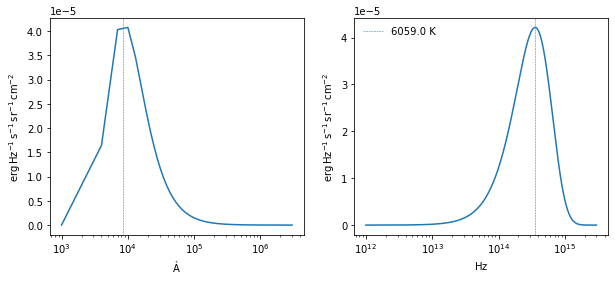

In [5]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4))
with quantity_support():
    ax0.semilogx(wavenumber, flux_w)
    ax0.axvline(wmax.value, ls='--', lw=0.5, label=str(np.round(T)))
with quantity_support():
    ax1.semilogx(nu, flux_n)
    ax1.axvline(nmax.value, ls='--', lw=0.5, label=str(np.round(T)))
plt.legend(frameon=False)
plt.show()

### Sampling from distribution

In [21]:
from pysampler import sampler, statistics
bb_dist = BlackBody(T)

In [11]:
freq = []
counts = []
nbins=40
nsamples=100
for i in range(nsamples):
    sample = sampler(bb_dist, nu.min(), nu.max(), resolution=1000, size=1000000, scale=1.)
    freq.append(sample)

In [15]:
average_sample, bin_center, mean, std = statistics(freq, nbins)

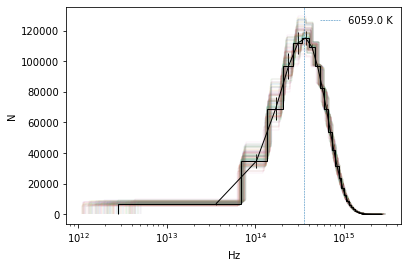

In [19]:
with quantity_support():
    plt.axvline(nmax.value, ls='--', lw=0.5, label=str(np.round(T)))
    for f in freq:
        plt.hist(f, bins=nbins, histtype='step', lw=0.1)

plt.hist(average_sample, bins=nbins, histtype='step', color='k')
plt.errorbar(bin_center, mean, yerr=std, color='k', lw=1) 

plt.xscale('log')
plt.ylabel('N')

plt.legend(frameon=False)
plt.show()